11. Use Iris flower dataset and perform following :
1. List down the features and their types (e.g., numeric, nominal)
available in the dataset. 2. Create a histogram for each feature in the
dataset to illustrate the feature distributions

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df=df.drop('Id',axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns

In [30]:
categorical_cols=df.select_dtypes(exclude=['int64','float64']).columns

In [31]:
numeric_cols

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [32]:
categorical_cols

Index(['Species'], dtype='object')

In [34]:
import matplotlib.pyplot as plt

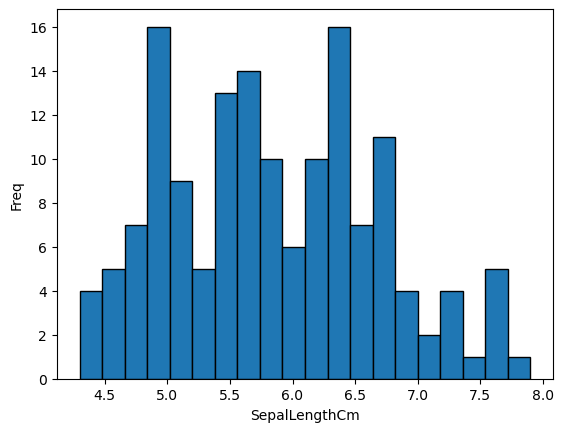

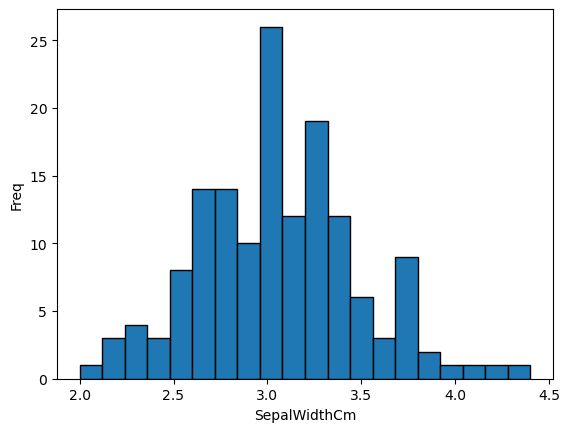

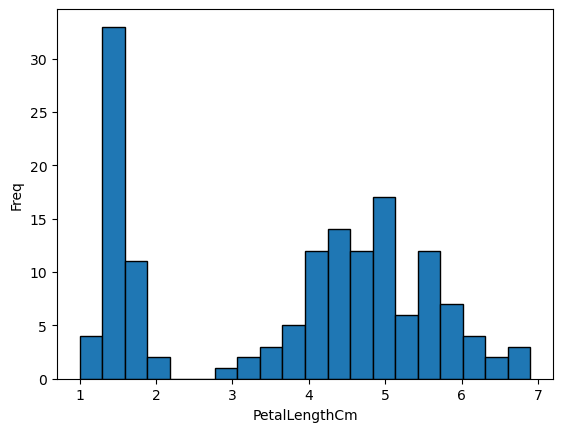

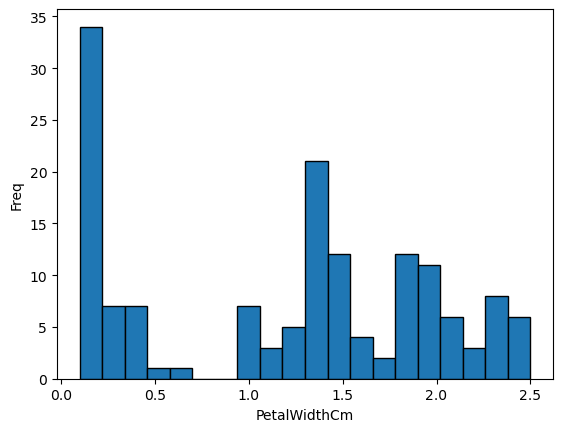

In [36]:
for col in numeric_cols:
    plt.hist(data=df.dropna(),x=col,edgecolor='black',bins=20)
    plt.xlabel(col)
    plt.ylabel('Freq')
    plt.show()

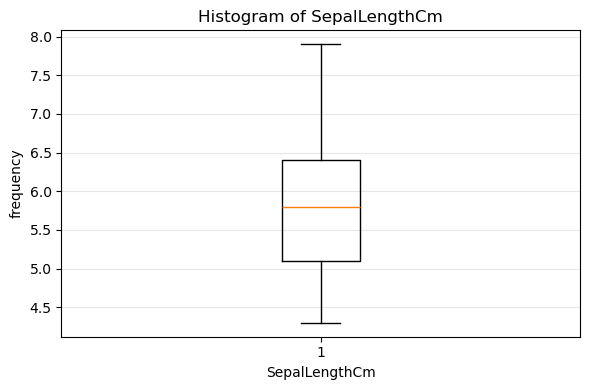

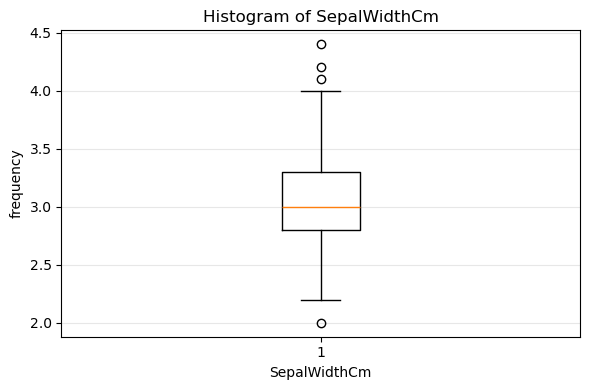

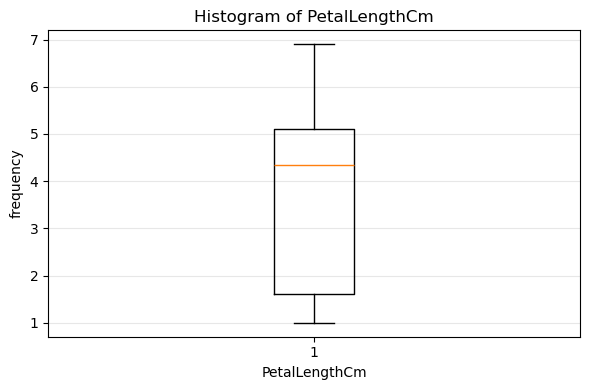

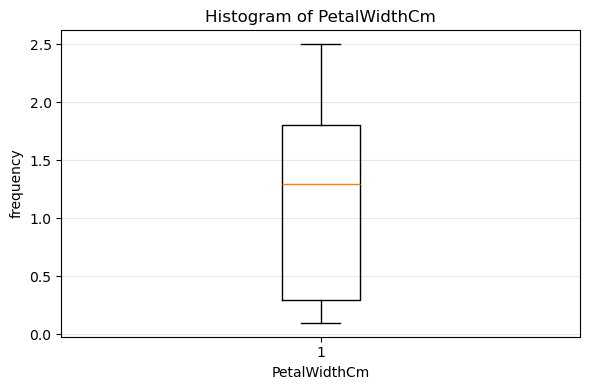

In [45]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

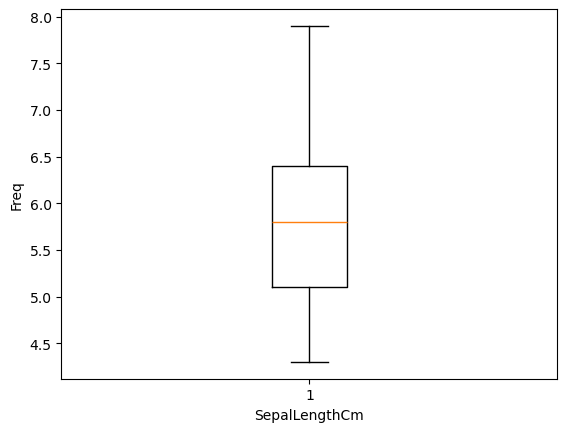

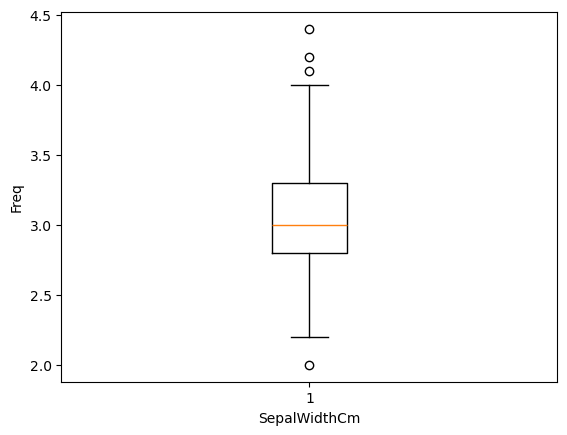

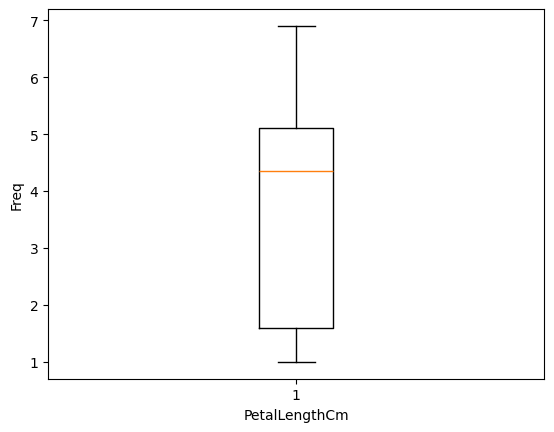

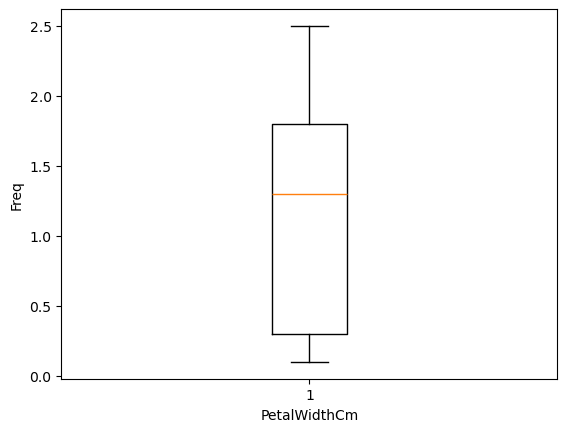

In [47]:
for col in numeric_cols:
    plt.boxplot(df[col].dropna())
    plt.xlabel(col)
    plt.ylabel('Freq')
    plt.show()

In [48]:
categorical_cols

Index(['Species'], dtype='object')

In [56]:
species=df['Species'].unique().tolist()

In [57]:
species

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [59]:
spec = df[df['Species']==species[0]]


In [63]:
spec.min(numeric_only=True)

SepalLengthCm    4.3
SepalWidthCm     2.3
PetalLengthCm    1.0
PetalWidthCm     0.1
dtype: float64

In [62]:
spec.var(numeric_only=True)

SepalLengthCm    0.124249
SepalWidthCm     0.145180
PetalLengthCm    0.030106
PetalWidthCm     0.011494
dtype: float64

In [67]:
for sp in species:
    print(f"\n========= Statistics for {sp} =========\n")
    spec = df[df['Species']==species[0]]
    print(f"Mean for {spec} : {spec.min(numeric_only=True)}", "\n")
    print(f"Variance for {spec} : {spec.var(numeric_only=True)}", "\n")
    


========= Statistics for Iris-setosa =========

Mean for     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0             5.1           3.5            1.4           0.2  Iris-setosa
1             4.9           3.0            1.4           0.2  Iris-setosa
2             4.7           3.2            1.3           0.2  Iris-setosa
3             4.6           3.1            1.5           0.2  Iris-setosa
4             5.0           3.6            1.4           0.2  Iris-setosa
5             5.4           3.9            1.7           0.4  Iris-setosa
6             4.6           3.4            1.4           0.3  Iris-setosa
7             5.0           3.4            1.5           0.2  Iris-setosa
8             4.4           2.9            1.4           0.2  Iris-setosa
9             4.9           3.1            1.5           0.1  Iris-setosa
10            5.4           3.7            1.5           0.2  Iris-setosa
11            4.8           3.4            1.6        

Write a program to cluster a set of points using K-means for IRIS
dataset. Consider, K=3, clusters. Consider Euclidean distance as the
distance measure. Randomly initialize a cluster mean as one of the data
points. Iterate at least for 10 iterations. After iterations are over, print the
final cluster means for each of the clusters.

In [69]:
from sklearn.cluster import KMeans

In [71]:
model = KMeans(n_clusters=3,init='random',n_init=1,max_iter=10,verbose=2)

In [72]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
X=df.drop('Species',axis=1)
y=['Species']

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scalar=MinMaxScaler()

In [88]:
X=scalar.fit_transform(X)

In [91]:
df['cluster']=model.fit_predict(X)

Initialization complete
Iteration 0, inertia 64.9269281700306.
Iteration 1, inertia 17.196321382336333.
Iteration 2, inertia 11.276274577942921.
Iteration 3, inertia 7.451019797331165.
Iteration 4, inertia 7.053788265953905.
Iteration 5, inertia 7.003317600098682.
Iteration 6, inertia 6.998114004826761.
Converged at iteration 6: strict convergence.


In [92]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [96]:
for i,center in enumerate(model.cluster_centers_):
    print(f'Cluster {i} is located at {center}')

Cluster 0 is located at [0.44125683 0.30737705 0.57571548 0.54918033]
Cluster 1 is located at [0.19611111 0.59083333 0.07864407 0.06      ]
Cluster 2 is located at [0.70726496 0.4508547  0.79704476 0.82478632]
